In [1]:
!pip install torch torchvision

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.autograd import Variable
import torchvision.utils as vutils

# Define the autoencoder model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Load and preprocess your image data
transform = transforms.Compose([
    transforms.ToTensor(),
])

batch_size = 128
train_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Initialize the model, loss function, and optimizer
autoencoder = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Training the autoencoder
num_epochs = 10
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        img = Variable(img)

        # Forward pass
        output = autoencoder(img)
        loss = criterion(output, img)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Save the trained model
torch.save(autoencoder.state_dict(), 'color_image_compressor_model.pth')


100%|██████████| 170498071/170498071 [00:06<00:00, 25892202.03it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Epoch [1/10], Loss: 0.0041
Epoch [2/10], Loss: 0.0024
Epoch [3/10], Loss: 0.0020
Epoch [4/10], Loss: 0.0017
Epoch [5/10], Loss: 0.0016
Epoch [6/10], Loss: 0.0013
Epoch [7/10], Loss: 0.0011
Epoch [8/10], Loss: 0.0012
Epoch [9/10], Loss: 0.0009
Epoch [10/10], Loss: 0.0008


In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
!pip install torchvision

Files already downloaded and verified
Original Images:


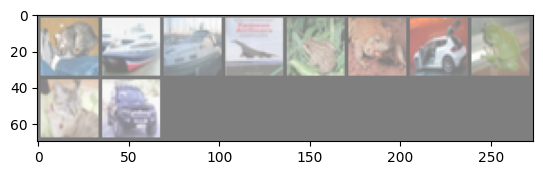

Reconstructed Images:


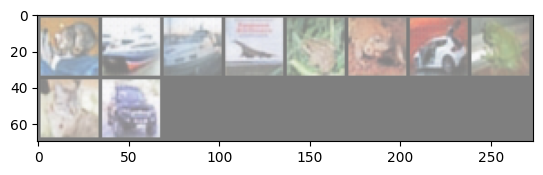

MSE Loss: 0.0009
PSNR: 30.66 dB


In [8]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import datasets
import matplotlib.pyplot as plt
import numpy as np
# Load the trained model
# Load the trained model
autoencoder = Autoencoder()
autoencoder.load_state_dict(torch.load('color_image_compressor_model.pth'))
autoencoder.eval()

# Load and preprocess the test set
transform = transforms.Compose([
    transforms.ToTensor(),
])

batch_size = 10
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Function to display images
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Test the autoencoder
with torch.no_grad():
    for data in test_loader:
        img, _ = data
        output = autoencoder(img)

        # Display original and reconstructed images
        print("Original Images:")
        imshow(torchvision.utils.make_grid(img))
        print("Reconstructed Images:")
        imshow(torchvision.utils.make_grid(output))

        # Calculate and print quantitative metrics (MSE, PSNR, etc.) if needed
        mse_loss = nn.MSELoss()(output, img)
        psnr = 10 * torch.log10(1 / mse_loss)
        print(f"MSE Loss: {mse_loss.item():.4f}")
        print(f"PSNR: {psnr.item():.2f} dB")
        break  # Display only one batch for simplicity


In [9]:
import torch
from torchvision import datasets, transforms
import os

# Load the trained model
autoencoder = Autoencoder()
autoencoder.load_state_dict(torch.load('color_image_compressor_model.pth'))
autoencoder.eval()

# Load and preprocess the test set
transform = transforms.Compose([
    transforms.ToTensor(),
])

test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1, shuffle=False)

# Calculate compression ratio for the entire test set
original_size = 0
compressed_size = 0

with torch.no_grad():
    for data in test_loader:
        img, _ = data
        original_size += img.numel()  # Number of elements in the tensor (pixels in this case)

        # Compress the image
        compressed_img = autoencoder(img)
        compressed_size += compressed_img.numel()

# Calculate compression ratio
compression_ratio = original_size / compressed_size

print(f"Original Size: {original_size} pixels")
print(f"Compressed Size: {compressed_size} pixels")
print(f"Compression Ratio: {compression_ratio:.2f}")


Files already downloaded and verified
Original Size: 30720000 pixels
Compressed Size: 30720000 pixels
Compression Ratio: 1.00
